# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

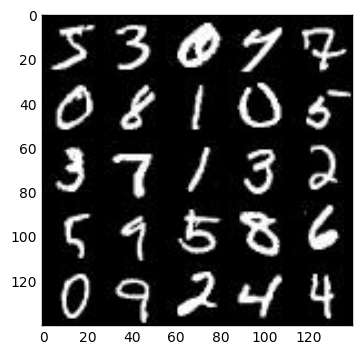

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

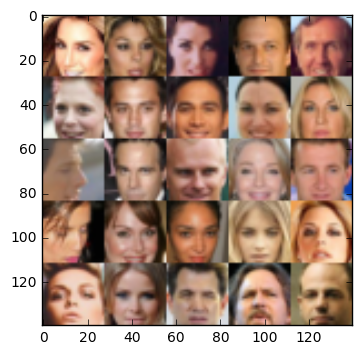

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width,image_height,image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    
    return (inputs_real,inputs_z,learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "C:\\Program Files\\Anaconda3\\lib\\runpy.py", line 184, in _run_module_as_main\n    "__main__", mod_spec)', 'File "C:\\Program Files\\Anaconda3\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "C:\\Program Files\\Anaconda3\\lib\\site-packages\\ipykernel\\__main__.py", line 3, in <module>\n    app.launch_new_instance()', 'File "C:\\Program Files\\Anaconda3\\lib\\site-packages\\traitlets\\config\\application.py", line 653, in launch_instance\n    app.start()', 'File "C:\\Program Files\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py", line 474, in start\n    ioloop.IOLoop.instance().start()', 'File "C:\\Program Files\\Anaconda3\\lib\\site-packages\\zmq\\eventloop\\io

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [8]:
def discriminator(images, reuse=False,alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator",reuse=reuse):
        x1 = tf.layers.conv2d(images,64,5,strides = 2,padding='same')
        relu1 = tf.maximum(alpha * x1,x1)
        
        x2 = tf.layers.conv2d(relu1,128,5,strides=2,padding='same')
        bn2 = tf.layers.batch_normalization(x2,training=True)
        relu2 = tf.maximum(alpha * bn2,bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        
    

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [9]:
def generator(z, out_channel_dim, is_train=True,reuse=False, alpha=0.2):##reuse有问题
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator",reuse= not is_train):
        x1 = tf.layers.dense(z, 7*7*512)

        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)

        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
       
        out = tf.tanh(logits) 
        
        
    
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Change the range from (-0.5, 0.5) to (-1, 1) to be consistent with batch_z
                batch_images *= 2
                #print("Min/Max: {} / {}".format(np.min(batch_images), np.max(batch_images)))
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % 10 == 0:
                    # Get the losses and print them out after each 10 steps
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 0.0000... Generator Loss: 22.5428
Epoch 1/2... Discriminator Loss: 1.3346... Generator Loss: 1.5480
Epoch 1/2... Discriminator Loss: 0.0459... Generator Loss: 4.6609
Epoch 1/2... Discriminator Loss: 3.4321... Generator Loss: 5.9199
Epoch 1/2... Discriminator Loss: 0.2894... Generator Loss: 2.6674
Epoch 1/2... Discriminator Loss: 0.9525... Generator Loss: 6.7214
Epoch 1/2... Discriminator Loss: 0.6660... Generator Loss: 1.1386
Epoch 1/2... Discriminator Loss: 0.3290... Generator Loss: 1.8053
Epoch 1/2... Discriminator Loss: 0.4714... Generator Loss: 2.3383
Epoch 1/2... Discriminator Loss: 0.7744... Generator Loss: 2.2711


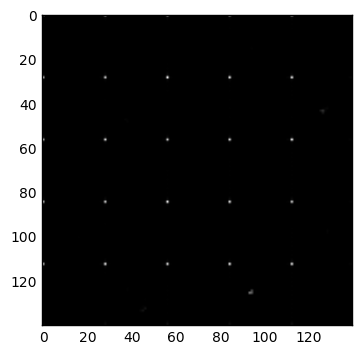

Epoch 1/2... Discriminator Loss: 0.5995... Generator Loss: 1.9717
Epoch 1/2... Discriminator Loss: 0.6884... Generator Loss: 1.7715
Epoch 1/2... Discriminator Loss: 0.7998... Generator Loss: 1.2012
Epoch 1/2... Discriminator Loss: 1.3789... Generator Loss: 3.8980
Epoch 1/2... Discriminator Loss: 0.5588... Generator Loss: 2.0363
Epoch 1/2... Discriminator Loss: 0.7342... Generator Loss: 1.0198
Epoch 1/2... Discriminator Loss: 1.1130... Generator Loss: 0.7076
Epoch 1/2... Discriminator Loss: 0.7317... Generator Loss: 2.2258
Epoch 1/2... Discriminator Loss: 1.1930... Generator Loss: 3.1416
Epoch 1/2... Discriminator Loss: 1.2913... Generator Loss: 0.5391


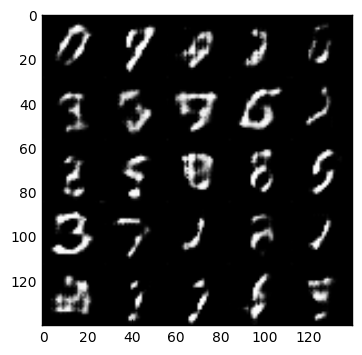

Epoch 1/2... Discriminator Loss: 0.5490... Generator Loss: 2.6999
Epoch 1/2... Discriminator Loss: 1.1508... Generator Loss: 1.4578
Epoch 1/2... Discriminator Loss: 2.1639... Generator Loss: 0.1650
Epoch 1/2... Discriminator Loss: 1.3509... Generator Loss: 0.5839
Epoch 1/2... Discriminator Loss: 0.8458... Generator Loss: 0.9726
Epoch 1/2... Discriminator Loss: 1.0314... Generator Loss: 1.0532
Epoch 1/2... Discriminator Loss: 1.3974... Generator Loss: 1.7582
Epoch 1/2... Discriminator Loss: 1.0836... Generator Loss: 1.0086
Epoch 1/2... Discriminator Loss: 1.8438... Generator Loss: 0.2451
Epoch 1/2... Discriminator Loss: 1.1466... Generator Loss: 1.7026


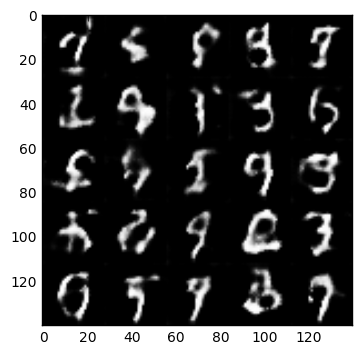

Epoch 1/2... Discriminator Loss: 0.9864... Generator Loss: 1.3099
Epoch 1/2... Discriminator Loss: 1.2125... Generator Loss: 0.6080
Epoch 1/2... Discriminator Loss: 0.9084... Generator Loss: 1.4881
Epoch 1/2... Discriminator Loss: 1.1904... Generator Loss: 0.5505
Epoch 1/2... Discriminator Loss: 1.1811... Generator Loss: 1.0229
Epoch 1/2... Discriminator Loss: 1.0079... Generator Loss: 1.2640
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 1.0937... Generator Loss: 0.7424
Epoch 1/2... Discriminator Loss: 1.1790... Generator Loss: 0.7064
Epoch 1/2... Discriminator Loss: 1.2170... Generator Loss: 0.6293


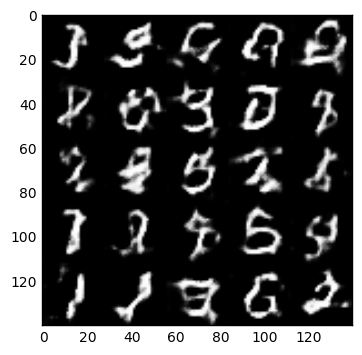

Epoch 1/2... Discriminator Loss: 1.4351... Generator Loss: 1.8699
Epoch 1/2... Discriminator Loss: 1.1872... Generator Loss: 1.2440
Epoch 1/2... Discriminator Loss: 1.1831... Generator Loss: 1.5256
Epoch 1/2... Discriminator Loss: 0.9067... Generator Loss: 1.0597
Epoch 1/2... Discriminator Loss: 1.0441... Generator Loss: 1.1472
Epoch 1/2... Discriminator Loss: 1.0302... Generator Loss: 0.9654
Epoch 1/2... Discriminator Loss: 1.0814... Generator Loss: 1.2062
Epoch 1/2... Discriminator Loss: 0.9678... Generator Loss: 0.9998
Epoch 1/2... Discriminator Loss: 0.9860... Generator Loss: 0.9372
Epoch 1/2... Discriminator Loss: 1.0050... Generator Loss: 1.2280


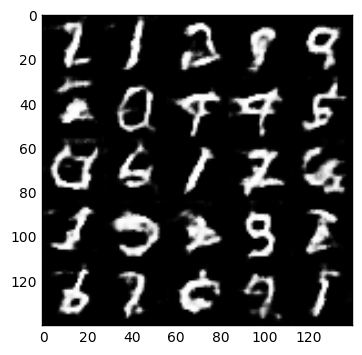

Epoch 1/2... Discriminator Loss: 1.0906... Generator Loss: 0.9726
Epoch 1/2... Discriminator Loss: 0.9532... Generator Loss: 1.5934
Epoch 1/2... Discriminator Loss: 1.0332... Generator Loss: 1.7771
Epoch 1/2... Discriminator Loss: 1.0439... Generator Loss: 1.3653
Epoch 1/2... Discriminator Loss: 0.9125... Generator Loss: 0.8855
Epoch 1/2... Discriminator Loss: 1.9591... Generator Loss: 3.0562
Epoch 1/2... Discriminator Loss: 1.5344... Generator Loss: 0.3608
Epoch 1/2... Discriminator Loss: 1.1767... Generator Loss: 2.0627
Epoch 1/2... Discriminator Loss: 1.1777... Generator Loss: 0.5388
Epoch 1/2... Discriminator Loss: 1.4353... Generator Loss: 2.5521


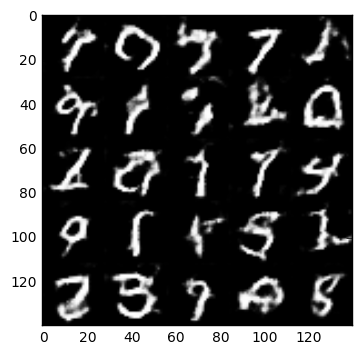

Epoch 1/2... Discriminator Loss: 1.1347... Generator Loss: 0.8107
Epoch 1/2... Discriminator Loss: 0.9789... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 1.0788... Generator Loss: 0.9790
Epoch 1/2... Discriminator Loss: 1.0253... Generator Loss: 0.8092
Epoch 1/2... Discriminator Loss: 1.0611... Generator Loss: 1.1785
Epoch 1/2... Discriminator Loss: 1.2234... Generator Loss: 0.6208
Epoch 1/2... Discriminator Loss: 1.0655... Generator Loss: 0.6844
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 0.6865
Epoch 1/2... Discriminator Loss: 1.0831... Generator Loss: 0.7175
Epoch 1/2... Discriminator Loss: 1.1288... Generator Loss: 0.9634


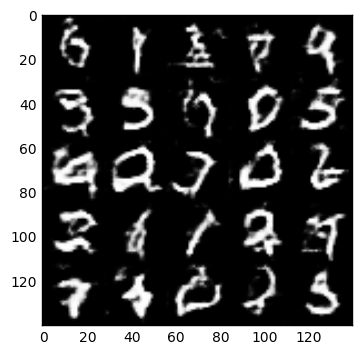

Epoch 1/2... Discriminator Loss: 1.2890... Generator Loss: 0.5386
Epoch 1/2... Discriminator Loss: 1.3057... Generator Loss: 0.6236
Epoch 1/2... Discriminator Loss: 0.9797... Generator Loss: 0.9501
Epoch 1/2... Discriminator Loss: 1.1482... Generator Loss: 1.1088
Epoch 1/2... Discriminator Loss: 0.9910... Generator Loss: 1.0620
Epoch 1/2... Discriminator Loss: 0.9890... Generator Loss: 0.8649
Epoch 1/2... Discriminator Loss: 1.3420... Generator Loss: 0.4066
Epoch 1/2... Discriminator Loss: 1.2727... Generator Loss: 0.6060
Epoch 1/2... Discriminator Loss: 1.6046... Generator Loss: 0.3511
Epoch 1/2... Discriminator Loss: 1.0720... Generator Loss: 0.7700


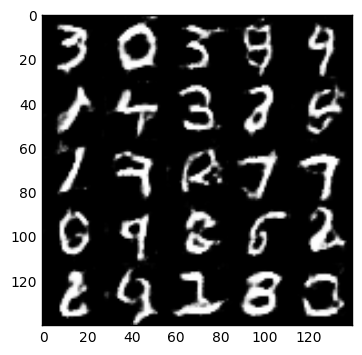

Epoch 1/2... Discriminator Loss: 1.0224... Generator Loss: 0.9525
Epoch 1/2... Discriminator Loss: 0.9866... Generator Loss: 1.0927
Epoch 1/2... Discriminator Loss: 1.0975... Generator Loss: 1.4942
Epoch 1/2... Discriminator Loss: 0.7625... Generator Loss: 1.5426
Epoch 1/2... Discriminator Loss: 0.9671... Generator Loss: 0.7712
Epoch 1/2... Discriminator Loss: 1.5101... Generator Loss: 0.4848
Epoch 1/2... Discriminator Loss: 1.1126... Generator Loss: 0.8707
Epoch 1/2... Discriminator Loss: 1.0797... Generator Loss: 0.6828
Epoch 1/2... Discriminator Loss: 1.0421... Generator Loss: 1.3349
Epoch 1/2... Discriminator Loss: 1.1748... Generator Loss: 0.5606


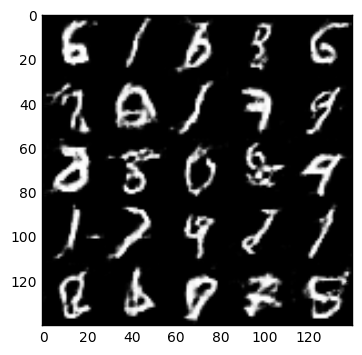

Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 1.7410
Epoch 1/2... Discriminator Loss: 1.0548... Generator Loss: 0.7425
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 0.6344
Epoch 2/2... Discriminator Loss: 0.9283... Generator Loss: 0.9105
Epoch 2/2... Discriminator Loss: 0.8508... Generator Loss: 1.2843
Epoch 2/2... Discriminator Loss: 1.1197... Generator Loss: 0.7066
Epoch 2/2... Discriminator Loss: 1.2634... Generator Loss: 0.5046
Epoch 2/2... Discriminator Loss: 1.1294... Generator Loss: 0.9473
Epoch 2/2... Discriminator Loss: 1.1351... Generator Loss: 0.7052
Epoch 2/2... Discriminator Loss: 1.2416... Generator Loss: 0.5573


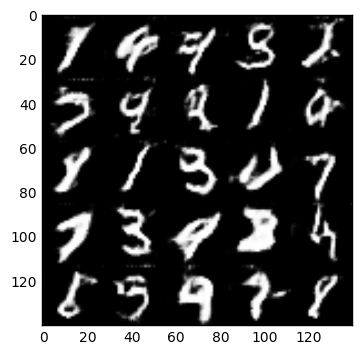

Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 0.9094
Epoch 2/2... Discriminator Loss: 0.9051... Generator Loss: 1.1558
Epoch 2/2... Discriminator Loss: 1.4995... Generator Loss: 0.3511
Epoch 2/2... Discriminator Loss: 1.2118... Generator Loss: 0.8415
Epoch 2/2... Discriminator Loss: 0.9177... Generator Loss: 1.1373
Epoch 2/2... Discriminator Loss: 0.7894... Generator Loss: 1.3730
Epoch 2/2... Discriminator Loss: 1.4568... Generator Loss: 0.3862
Epoch 2/2... Discriminator Loss: 0.9143... Generator Loss: 1.3246
Epoch 2/2... Discriminator Loss: 1.0205... Generator Loss: 0.8237
Epoch 2/2... Discriminator Loss: 1.1918... Generator Loss: 0.6856


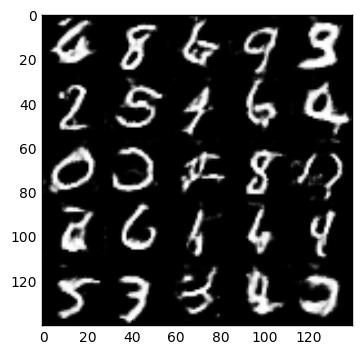

Epoch 2/2... Discriminator Loss: 0.8568... Generator Loss: 1.0257
Epoch 2/2... Discriminator Loss: 1.2176... Generator Loss: 0.5542
Epoch 2/2... Discriminator Loss: 1.0329... Generator Loss: 0.6878
Epoch 2/2... Discriminator Loss: 1.0472... Generator Loss: 0.6646
Epoch 2/2... Discriminator Loss: 1.0246... Generator Loss: 1.2019
Epoch 2/2... Discriminator Loss: 1.3286... Generator Loss: 1.7822
Epoch 2/2... Discriminator Loss: 0.9109... Generator Loss: 1.1243
Epoch 2/2... Discriminator Loss: 1.1893... Generator Loss: 0.6258
Epoch 2/2... Discriminator Loss: 1.1062... Generator Loss: 0.6621
Epoch 2/2... Discriminator Loss: 0.9014... Generator Loss: 1.6613


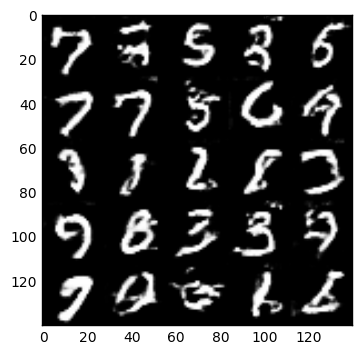

Epoch 2/2... Discriminator Loss: 1.0949... Generator Loss: 0.6321
Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 1.5726
Epoch 2/2... Discriminator Loss: 0.9077... Generator Loss: 0.8313
Epoch 2/2... Discriminator Loss: 0.9846... Generator Loss: 1.1753
Epoch 2/2... Discriminator Loss: 1.8551... Generator Loss: 3.2237
Epoch 2/2... Discriminator Loss: 0.8437... Generator Loss: 1.6430
Epoch 2/2... Discriminator Loss: 1.2969... Generator Loss: 0.5034
Epoch 2/2... Discriminator Loss: 1.4196... Generator Loss: 0.4317
Epoch 2/2... Discriminator Loss: 0.9102... Generator Loss: 1.5154
Epoch 2/2... Discriminator Loss: 1.1258... Generator Loss: 1.7741


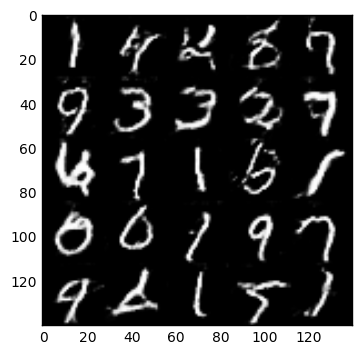

Epoch 2/2... Discriminator Loss: 1.1543... Generator Loss: 0.8252
Epoch 2/2... Discriminator Loss: 1.2058... Generator Loss: 1.5629
Epoch 2/2... Discriminator Loss: 1.2718... Generator Loss: 2.4334
Epoch 2/2... Discriminator Loss: 1.0936... Generator Loss: 1.1223
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.9627
Epoch 2/2... Discriminator Loss: 1.1765... Generator Loss: 0.6227
Epoch 2/2... Discriminator Loss: 0.8630... Generator Loss: 1.5571
Epoch 2/2... Discriminator Loss: 0.7042... Generator Loss: 1.0200
Epoch 2/2... Discriminator Loss: 1.1806... Generator Loss: 0.5902
Epoch 2/2... Discriminator Loss: 1.0701... Generator Loss: 0.9072


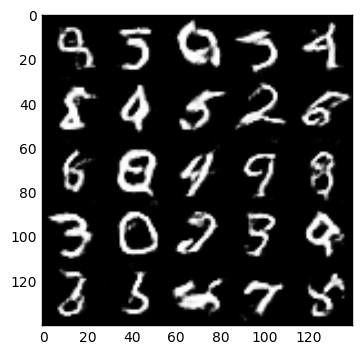

Epoch 2/2... Discriminator Loss: 0.8874... Generator Loss: 1.1190
Epoch 2/2... Discriminator Loss: 0.9714... Generator Loss: 1.2243
Epoch 2/2... Discriminator Loss: 0.9955... Generator Loss: 0.8009
Epoch 2/2... Discriminator Loss: 1.1881... Generator Loss: 0.5918
Epoch 2/2... Discriminator Loss: 1.7357... Generator Loss: 0.2712
Epoch 2/2... Discriminator Loss: 0.8691... Generator Loss: 1.4293
Epoch 2/2... Discriminator Loss: 0.9104... Generator Loss: 1.0189
Epoch 2/2... Discriminator Loss: 0.6135... Generator Loss: 1.4232
Epoch 2/2... Discriminator Loss: 0.7653... Generator Loss: 0.9904
Epoch 2/2... Discriminator Loss: 0.5758... Generator Loss: 1.8064


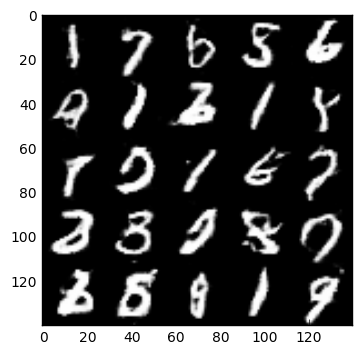

Epoch 2/2... Discriminator Loss: 0.8753... Generator Loss: 0.9954
Epoch 2/2... Discriminator Loss: 0.9154... Generator Loss: 1.3292
Epoch 2/2... Discriminator Loss: 0.7261... Generator Loss: 1.7647
Epoch 2/2... Discriminator Loss: 0.8943... Generator Loss: 1.0661
Epoch 2/2... Discriminator Loss: 0.8327... Generator Loss: 1.1632
Epoch 2/2... Discriminator Loss: 0.9354... Generator Loss: 0.9302
Epoch 2/2... Discriminator Loss: 1.1179... Generator Loss: 0.5870
Epoch 2/2... Discriminator Loss: 1.4058... Generator Loss: 0.5345
Epoch 2/2... Discriminator Loss: 1.2221... Generator Loss: 0.6333
Epoch 2/2... Discriminator Loss: 0.9935... Generator Loss: 0.8644


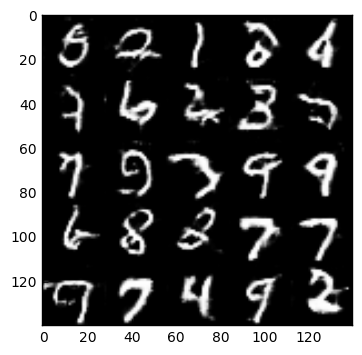

Epoch 2/2... Discriminator Loss: 0.9815... Generator Loss: 1.0480
Epoch 2/2... Discriminator Loss: 0.7923... Generator Loss: 1.0541
Epoch 2/2... Discriminator Loss: 1.0588... Generator Loss: 0.6679
Epoch 2/2... Discriminator Loss: 0.6863... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 2.0210... Generator Loss: 0.2263
Epoch 2/2... Discriminator Loss: 0.8732... Generator Loss: 1.5309
Epoch 2/2... Discriminator Loss: 0.9584... Generator Loss: 0.7522
Epoch 2/2... Discriminator Loss: 1.2419... Generator Loss: 2.3737
Epoch 2/2... Discriminator Loss: 0.8963... Generator Loss: 0.7831
Epoch 2/2... Discriminator Loss: 1.5978... Generator Loss: 0.3199


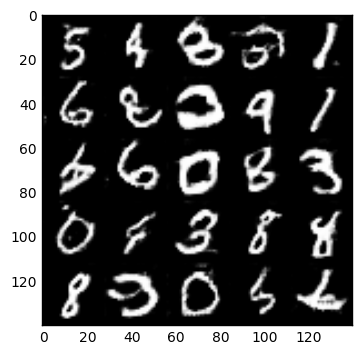

Epoch 2/2... Discriminator Loss: 0.7954... Generator Loss: 0.9393
Epoch 2/2... Discriminator Loss: 0.8813... Generator Loss: 0.9728
Epoch 2/2... Discriminator Loss: 1.7298... Generator Loss: 0.3343
Epoch 2/2... Discriminator Loss: 1.0458... Generator Loss: 1.6367
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.6826
Epoch 2/2... Discriminator Loss: 0.6296... Generator Loss: 1.3755
Epoch 2/2... Discriminator Loss: 1.1614... Generator Loss: 0.6416
Epoch 2/2... Discriminator Loss: 2.2383... Generator Loss: 0.2440
Epoch 2/2... Discriminator Loss: 0.5705... Generator Loss: 1.8826
Epoch 2/2... Discriminator Loss: 1.2052... Generator Loss: 0.7119


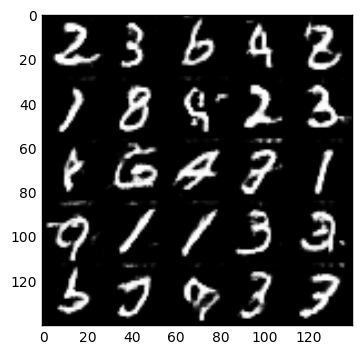

Epoch 2/2... Discriminator Loss: 1.0694... Generator Loss: 0.8643
Epoch 2/2... Discriminator Loss: 1.3160... Generator Loss: 0.5089
Epoch 2/2... Discriminator Loss: 0.8688... Generator Loss: 1.0148
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 1.5086
Epoch 2/2... Discriminator Loss: 0.9926... Generator Loss: 1.7151
Epoch 2/2... Discriminator Loss: 0.8205... Generator Loss: 1.0773
Epoch 2/2... Discriminator Loss: 0.8765... Generator Loss: 0.8259


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 0.0037... Generator Loss: 24.8428
Epoch 1/1... Discriminator Loss: 0.0038... Generator Loss: 19.0828
Epoch 1/1... Discriminator Loss: 0.1090... Generator Loss: 17.9736
Epoch 1/1... Discriminator Loss: 2.1152... Generator Loss: 4.6619
Epoch 1/1... Discriminator Loss: 4.4792... Generator Loss: 0.0774
Epoch 1/1... Discriminator Loss: 0.5036... Generator Loss: 2.0415
Epoch 1/1... Discriminator Loss: 0.9768... Generator Loss: 5.0901
Epoch 1/1... Discriminator Loss: 0.4575... Generator Loss: 3.1205
Epoch 1/1... Discriminator Loss: 3.7821... Generator Loss: 10.1481
Epoch 1/1... Discriminator Loss: 0.2501... Generator Loss: 2.9776


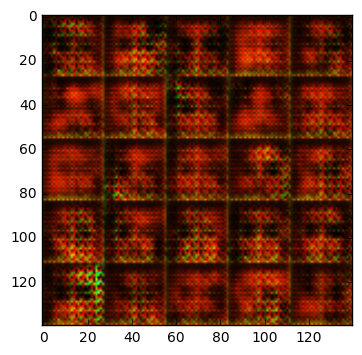

Epoch 1/1... Discriminator Loss: 0.2243... Generator Loss: 4.3356
Epoch 1/1... Discriminator Loss: 0.7391... Generator Loss: 1.2378
Epoch 1/1... Discriminator Loss: 0.1074... Generator Loss: 5.5341
Epoch 1/1... Discriminator Loss: 1.7466... Generator Loss: 0.4396
Epoch 1/1... Discriminator Loss: 0.7412... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 0.2477... Generator Loss: 3.4674
Epoch 1/1... Discriminator Loss: 1.6934... Generator Loss: 0.8232
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 1.6691... Generator Loss: 0.5454
Epoch 1/1... Discriminator Loss: 1.6076... Generator Loss: 1.7446


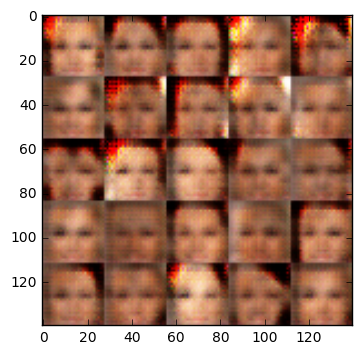

Epoch 1/1... Discriminator Loss: 1.7042... Generator Loss: 2.0667
Epoch 1/1... Discriminator Loss: 0.9223... Generator Loss: 1.1995
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 1.2420
Epoch 1/1... Discriminator Loss: 1.2267... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 1.4862... Generator Loss: 0.4024
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.5593
Epoch 1/1... Discriminator Loss: 1.0938... Generator Loss: 0.8598
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.4335... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.9455... Generator Loss: 0.2960


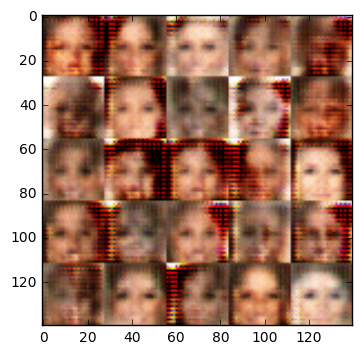

Epoch 1/1... Discriminator Loss: 1.4221... Generator Loss: 0.5122
Epoch 1/1... Discriminator Loss: 1.1450... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 1.8095... Generator Loss: 2.1180
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.6498
Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.9509
Epoch 1/1... Discriminator Loss: 2.3449... Generator Loss: 0.1205
Epoch 1/1... Discriminator Loss: 1.1382... Generator Loss: 0.7908
Epoch 1/1... Discriminator Loss: 0.8808... Generator Loss: 1.4684
Epoch 1/1... Discriminator Loss: 1.4739... Generator Loss: 1.6131
Epoch 1/1... Discriminator Loss: 1.0951... Generator Loss: 0.9529


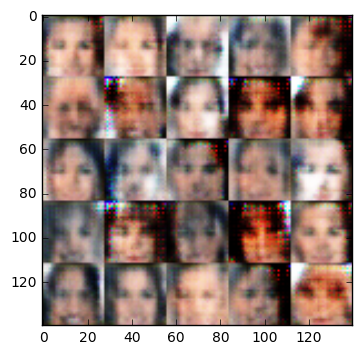

Epoch 1/1... Discriminator Loss: 1.4612... Generator Loss: 1.2402
Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 1.1064
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.5613
Epoch 1/1... Discriminator Loss: 1.0808... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.1369... Generator Loss: 1.0194
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 1.1618
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.1355
Epoch 1/1... Discriminator Loss: 1.7648... Generator Loss: 0.5537
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.6432


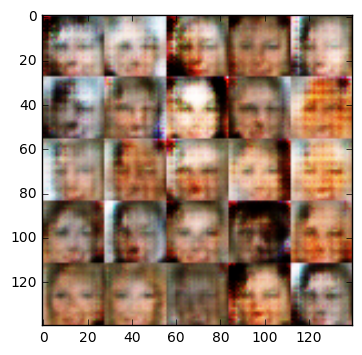

Epoch 1/1... Discriminator Loss: 1.6093... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.0521... Generator Loss: 0.8568
Epoch 1/1... Discriminator Loss: 1.5779... Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.7430... Generator Loss: 0.2858
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 1.0724
Epoch 1/1... Discriminator Loss: 2.1477... Generator Loss: 1.8936
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.2207... Generator Loss: 1.5112
Epoch 1/1... Discriminator Loss: 1.0511... Generator Loss: 0.7181


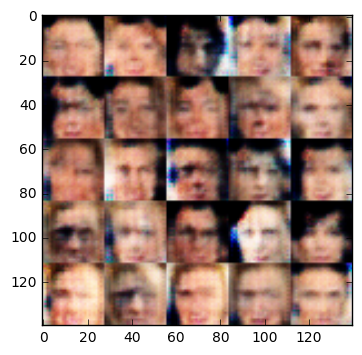

Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.4943
Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.3997
Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 0.9789
Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.9235... Generator Loss: 0.2508
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.5449... Generator Loss: 0.5214
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 1.0543
Epoch 1/1... Discriminator Loss: 2.0444... Generator Loss: 1.9063
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.6043


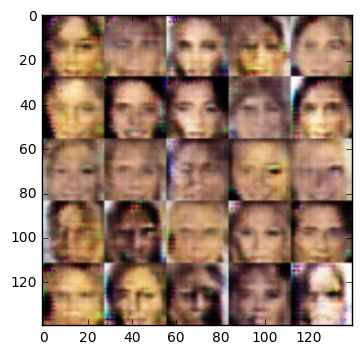

Epoch 1/1... Discriminator Loss: 1.5450... Generator Loss: 0.6871
Epoch 1/1... Discriminator Loss: 1.3722... Generator Loss: 0.5109
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.3182... Generator Loss: 1.1913
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.3801
Epoch 1/1... Discriminator Loss: 0.9275... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.0243... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.5765... Generator Loss: 0.3298
Epoch 1/1... Discriminator Loss: 1.4709... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.1094... Generator Loss: 0.6290


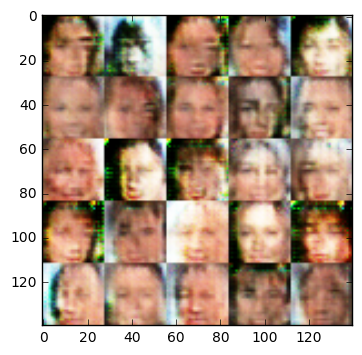

Epoch 1/1... Discriminator Loss: 1.4446... Generator Loss: 0.4900
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 0.6984
Epoch 1/1... Discriminator Loss: 1.6646... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 0.6123
Epoch 1/1... Discriminator Loss: 1.5026... Generator Loss: 0.4613
Epoch 1/1... Discriminator Loss: 1.6139... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 1.3614
Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 1.1200
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.5738
Epoch 1/1... Discriminator Loss: 1.5314... Generator Loss: 0.6999


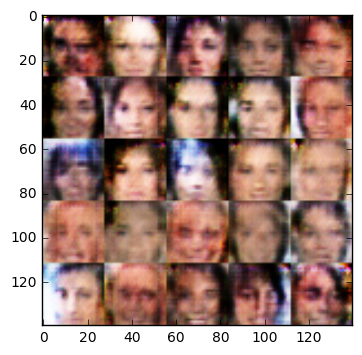

Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 1.0479
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 1.1367
Epoch 1/1... Discriminator Loss: 1.0894... Generator Loss: 0.6824
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 1.0173
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 1.1043
Epoch 1/1... Discriminator Loss: 1.2359... Generator Loss: 0.7756
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.6060


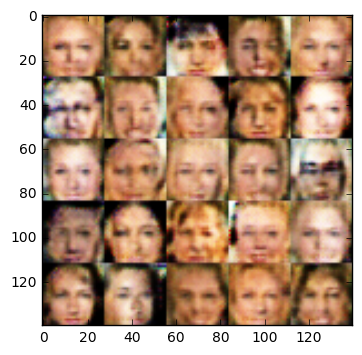

Epoch 1/1... Discriminator Loss: 1.4943... Generator Loss: 1.1626
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.4964
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.1896... Generator Loss: 0.5486
Epoch 1/1... Discriminator Loss: 1.6250... Generator Loss: 1.6847
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 1.0236
Epoch 1/1... Discriminator Loss: 1.2416... Generator Loss: 0.9258
Epoch 1/1... Discriminator Loss: 1.0879... Generator Loss: 1.0458
Epoch 1/1... Discriminator Loss: 1.5279... Generator Loss: 0.3225
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.5240


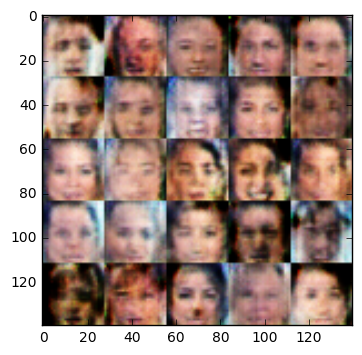

Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.9545
Epoch 1/1... Discriminator Loss: 1.6569... Generator Loss: 1.6697
Epoch 1/1... Discriminator Loss: 1.3794... Generator Loss: 0.5145
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.9908
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.5722
Epoch 1/1... Discriminator Loss: 1.4926... Generator Loss: 0.9131
Epoch 1/1... Discriminator Loss: 1.5368... Generator Loss: 0.3288
Epoch 1/1... Discriminator Loss: 1.1351... Generator Loss: 0.8881
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.9028


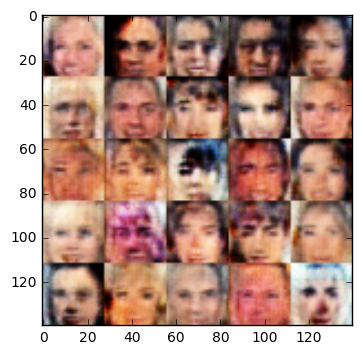

Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.5994
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.5829
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 1.3566
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.4990
Epoch 1/1... Discriminator Loss: 0.8402... Generator Loss: 1.0349
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.5421... Generator Loss: 1.1766
Epoch 1/1... Discriminator Loss: 1.1077... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.6499
Epoch 1/1... Discriminator Loss: 1.2784... Generator Loss: 0.5686


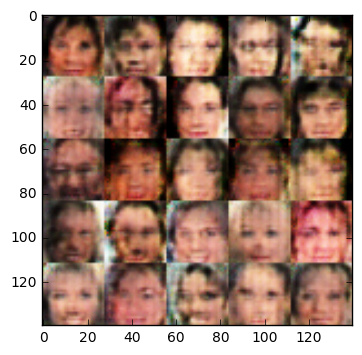

Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 0.7103
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.2903... Generator Loss: 0.7516
Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.7623
Epoch 1/1... Discriminator Loss: 0.6772... Generator Loss: 1.1766
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.8010... Generator Loss: 0.5880
Epoch 1/1... Discriminator Loss: 1.0877... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 1.4486... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.7595


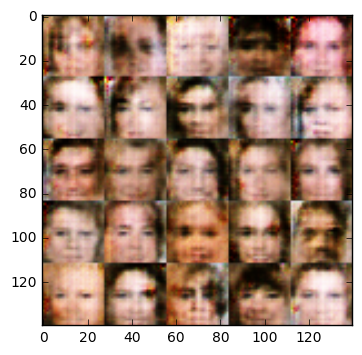

Epoch 1/1... Discriminator Loss: 0.5495... Generator Loss: 1.4942
Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 1.0187
Epoch 1/1... Discriminator Loss: 1.8729... Generator Loss: 0.3244
Epoch 1/1... Discriminator Loss: 1.5548... Generator Loss: 0.3586
Epoch 1/1... Discriminator Loss: 1.6790... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.7123
Epoch 1/1... Discriminator Loss: 1.1846... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 0.9310
Epoch 1/1... Discriminator Loss: 1.5401... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.6113... Generator Loss: 0.4012


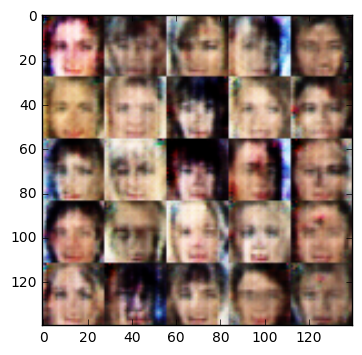

Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 1.3732
Epoch 1/1... Discriminator Loss: 1.2314... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 1.0185
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.4082... Generator Loss: 0.8249
Epoch 1/1... Discriminator Loss: 1.0233... Generator Loss: 1.0897
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.5727


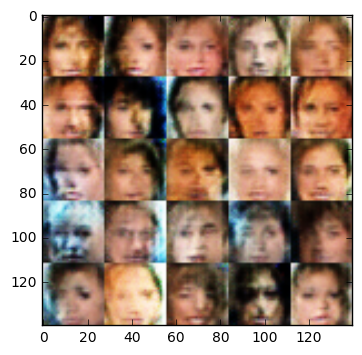

Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.6452
Epoch 1/1... Discriminator Loss: 1.4908... Generator Loss: 0.9619
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.6441
Epoch 1/1... Discriminator Loss: 1.4249... Generator Loss: 0.8607
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.9764
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9112
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.7331
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 1.1086


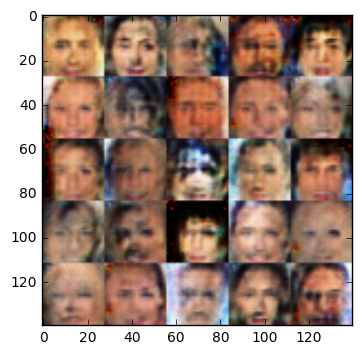

Epoch 1/1... Discriminator Loss: 1.1825... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 1.6480... Generator Loss: 0.3172
Epoch 1/1... Discriminator Loss: 1.5753... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 0.7116
Epoch 1/1... Discriminator Loss: 1.3925... Generator Loss: 0.4804
Epoch 1/1... Discriminator Loss: 1.4330... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.8004... Generator Loss: 0.2743
Epoch 1/1... Discriminator Loss: 1.1668... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 1.1694
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.6878


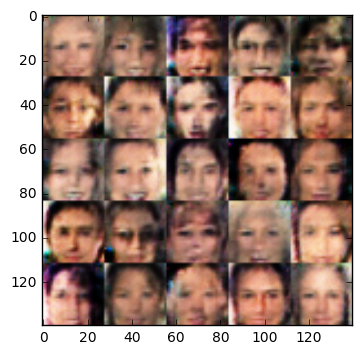

Epoch 1/1... Discriminator Loss: 0.9283... Generator Loss: 1.3309
Epoch 1/1... Discriminator Loss: 1.4764... Generator Loss: 0.7539
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 1.1295
Epoch 1/1... Discriminator Loss: 1.5681... Generator Loss: 0.5543
Epoch 1/1... Discriminator Loss: 1.3606... Generator Loss: 0.7118
Epoch 1/1... Discriminator Loss: 1.7109... Generator Loss: 0.3024
Epoch 1/1... Discriminator Loss: 1.2577... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 0.6835


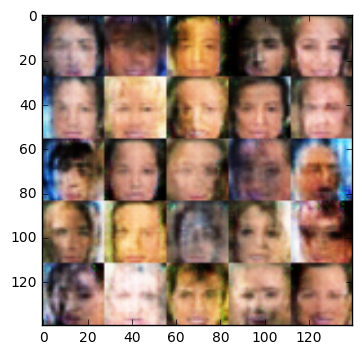

Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.5261... Generator Loss: 0.5711
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.7249
Epoch 1/1... Discriminator Loss: 1.4940... Generator Loss: 0.7532
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 0.8400... Generator Loss: 1.7172
Epoch 1/1... Discriminator Loss: 1.5607... Generator Loss: 0.8870
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.5986
Epoch 1/1... Discriminator Loss: 1.2671... Generator Loss: 0.6534


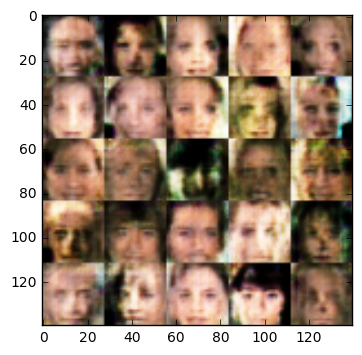

Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.7572
Epoch 1/1... Discriminator Loss: 1.5852... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.9245
Epoch 1/1... Discriminator Loss: 1.5719... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4962... Generator Loss: 0.5421
Epoch 1/1... Discriminator Loss: 1.4558... Generator Loss: 0.8937
Epoch 1/1... Discriminator Loss: 1.0273... Generator Loss: 0.9913
Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 0.6465
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.5232


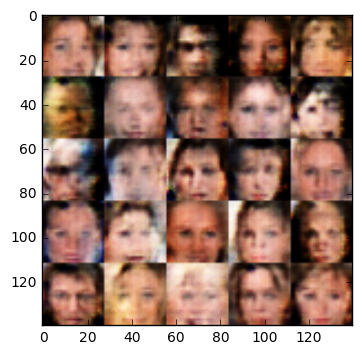

Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.5763
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.2351... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.8183
Epoch 1/1... Discriminator Loss: 1.4010... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.7568
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.3524... Generator Loss: 0.5687
Epoch 1/1... Discriminator Loss: 1.3918... Generator Loss: 0.5080


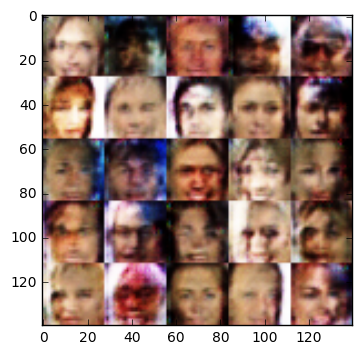

Epoch 1/1... Discriminator Loss: 1.3009... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 0.5850
Epoch 1/1... Discriminator Loss: 1.4278... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.7528
Epoch 1/1... Discriminator Loss: 1.4898... Generator Loss: 0.9979
Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 1.0190
Epoch 1/1... Discriminator Loss: 1.6337... Generator Loss: 0.4072
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.7640
Epoch 1/1... Discriminator Loss: 1.5207... Generator Loss: 0.8125


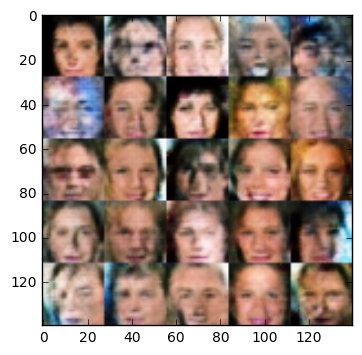

Epoch 1/1... Discriminator Loss: 1.4690... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.3203... Generator Loss: 0.6358
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.5175
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.6557
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.8382
Epoch 1/1... Discriminator Loss: 1.4419... Generator Loss: 0.6569
Epoch 1/1... Discriminator Loss: 1.2889... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.6563
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.7316


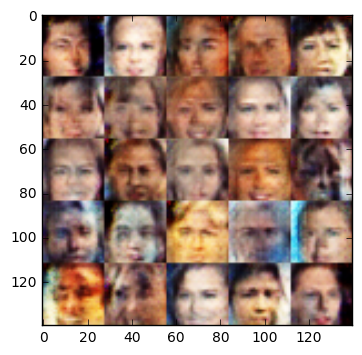

Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.5284... Generator Loss: 0.3576
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.9163
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.7706
Epoch 1/1... Discriminator Loss: 1.3907... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3981... Generator Loss: 0.4822
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.5982
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.2853... Generator Loss: 0.8108


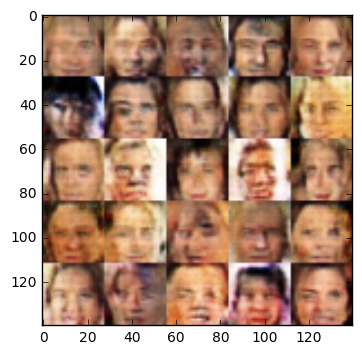

Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.6459
Epoch 1/1... Discriminator Loss: 1.5120... Generator Loss: 0.7736
Epoch 1/1... Discriminator Loss: 1.2227... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.9194
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.5423
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.2630... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.4567... Generator Loss: 0.6667
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 0.5863


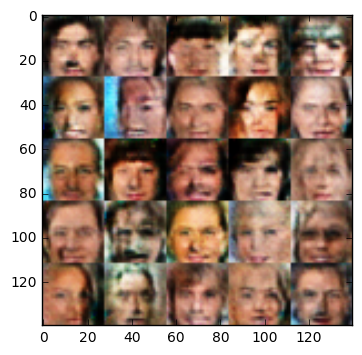

Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 0.6976
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.7307
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.5736
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6268
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.7928


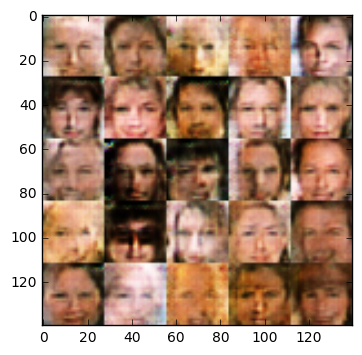

Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.7135
Epoch 1/1... Discriminator Loss: 1.4813... Generator Loss: 0.4169
Epoch 1/1... Discriminator Loss: 1.4182... Generator Loss: 1.0750
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.8601
Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.7141
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.6277
Epoch 1/1... Discriminator Loss: 1.3327... Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.6455


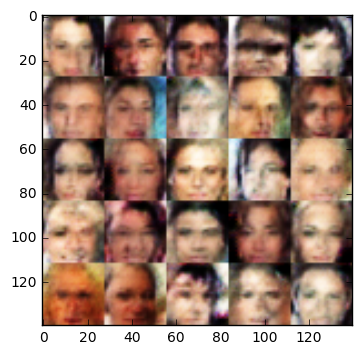

Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.5768
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 1.0524
Epoch 1/1... Discriminator Loss: 1.5630... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.6104


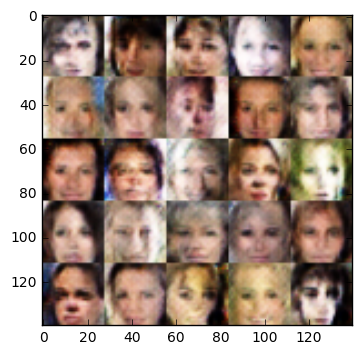

Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.4381
Epoch 1/1... Discriminator Loss: 1.3724... Generator Loss: 1.0196
Epoch 1/1... Discriminator Loss: 1.4601... Generator Loss: 0.6827
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.3633... Generator Loss: 0.7179
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.5908
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.4015... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.4412... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.5997


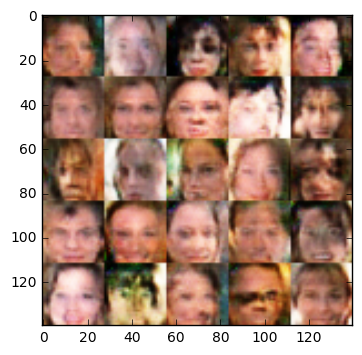

Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 1.2817... Generator Loss: 0.7105
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7070
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.6208
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.7490
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.9946
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.7836
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 0.6941


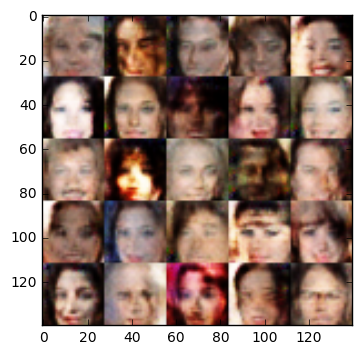

Epoch 1/1... Discriminator Loss: 1.5113... Generator Loss: 0.4812
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.8951
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.8406
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.4220... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.5783


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。